# EDA on LIWC Features

Coco Yu  
December 11, 2024

## Code Status

## Notes

## Setup

Chunk Defaults

In [ ]:
knitr::opts_chunk$set(attr.output='style="max-height: 500px;"')


Conflicts

In [ ]:
options(conflicts.policy = "depends.ok")


In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

here() starts at /Users/yujiachen/Desktop/github/study_messages

Source Functions

In [ ]:
devtools::source_url("https://github.com/jjcurtin/lab_support/blob/main/format_path.R?raw=true")


ℹ SHA-1 hash of file is "a58e57da996d1b70bb9a5b58241325d6fd78890f"

ℹ SHA-1 hash of file is "c045eee2655a18dc85e715b78182f176327358a7"

Absolute Paths

In [ ]:
path_messages <- format_path(str_c("studydata/risk/data_processed/messages"))


Read in Data

In [ ]:
stats_ind <- read_csv(here(path_messages, "eda", "eda_liwc_ind.csv")) |> 
  glimpse()


Rows: 468 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): skim_type, skim_variable
dbl (5): complete_rate, numeric.sd, numeric.p0, numeric.p50, numeric.p100

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 468
Columns: 7
$ skim_type     <chr> "numeric", "numeric", "numeric", "numeric", "numeric", "…
$ skim_variable <chr> "wc_median_3day", "wc_q_95_3day", "analytic_median_3day"…
$ complete_rate <dbl> 0.8808165, 0.8808165, 0.8751081, 0.8751081, 0.8721674, 0…
$ numeric.sd    <dbl> 5.4263712, 20.3063613, 17.1087023, 19.2376139, 32.722453…
$ numeric.p0    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ numeric.p50   <dbl> 7.0000000, 26.4000000, 10.1900000, 97.1955000, 40.060000…
$ numeric.p100  <dbl> 142.000000, 369.050000, 99.000000, 99.000000, 99.000000,…

Rows: 468 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): skim_type, skim_variable
dbl (5): complete_rate, numeric.sd, numeric.p0, numeric.p50, numeric.p100

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Rows: 468
Columns: 7
$ skim_type     <chr> "numeric", "numeric", "numeric", "numeric", "numeric", "…
$ skim_variable <chr> "wc_raw_3day", "analytic_raw_3day", "clout_raw_3day", "a…
$ complete_rate <dbl> 0.8808165, 0.8751081, 0.8721674, 0.8757135, 0.8599723, 0…
$ numeric.sd    <dbl> 1175.2249522, 16.9623738, 25.3728003, 22.3378901, 23.279…
$ numeric.p0    <dbl> 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ numeric.p50   <dbl> 512.000, 19.050, 50.195, 77.130, 82.190, 10.760, 10.680,…
$ numeric.p100  <dbl> 13211.00, 99.00, 99.00, 99.00, 99.00, 295.00, 100.00, 10…

## EDA on indiviudal messages

In [ ]:
plt1_ind <- plot_grid(
  stats_ind |> 
    filter(!str_detect(skim_variable, "wc|wps|analytic|tone|clout|authentic")) |>
    filter(str_detect(skim_variable, "3day")) |> 
    # filter(numeric.p50 != 0) |> 
    ggplot(aes(x = numeric.p50)) +
    geom_histogram(fill = "#97C4C5", bins = 50) +
    scale_y_continuous(breaks = seq(0, 160, by = 20)) +
    labs(x = "median feature score", y = "counts"),
  stats_ind |> 
    filter(!str_detect(skim_variable, "wc|wps|analytic|tone|clout|authentic")) |>
    filter(str_detect(skim_variable, "3day")) |> 
    ggplot(aes(x = numeric.p100)) +
    geom_histogram(fill = "#97C4C5", bins = 50) +
    scale_y_continuous(breaks = seq(0, 100, by = 20)) +
    labs(x = "max feature score", y = "counts")
)

plt2_ind <- plot_grid(
  stats_ind |> 
    filter(!str_detect(skim_variable, "wc|wps|analytic|tone|clout|authentic")) |>
    filter(str_detect(skim_variable, "1week")) |> 
    # filter(numeric.p50 != 0) |> 
    ggplot(aes(x = numeric.p50)) +
    geom_histogram(fill = "#97C4C5", bins = 50) +
    scale_y_continuous(breaks = seq(0, 160, by = 20)) +
    labs(x = "median feature score", y = "counts"),
  stats_ind |> 
    filter(!str_detect(skim_variable, "wc|wps|analytic|tone|clout|authentic")) |>
    filter(str_detect(skim_variable, "1week")) |> 
    ggplot(aes(x = numeric.p100)) +
    geom_histogram(fill = "#97C4C5", bins = 50) +
    scale_y_continuous(breaks = seq(0, 100, by = 20)) +
    labs(x = "max feature score", y = "counts")
)


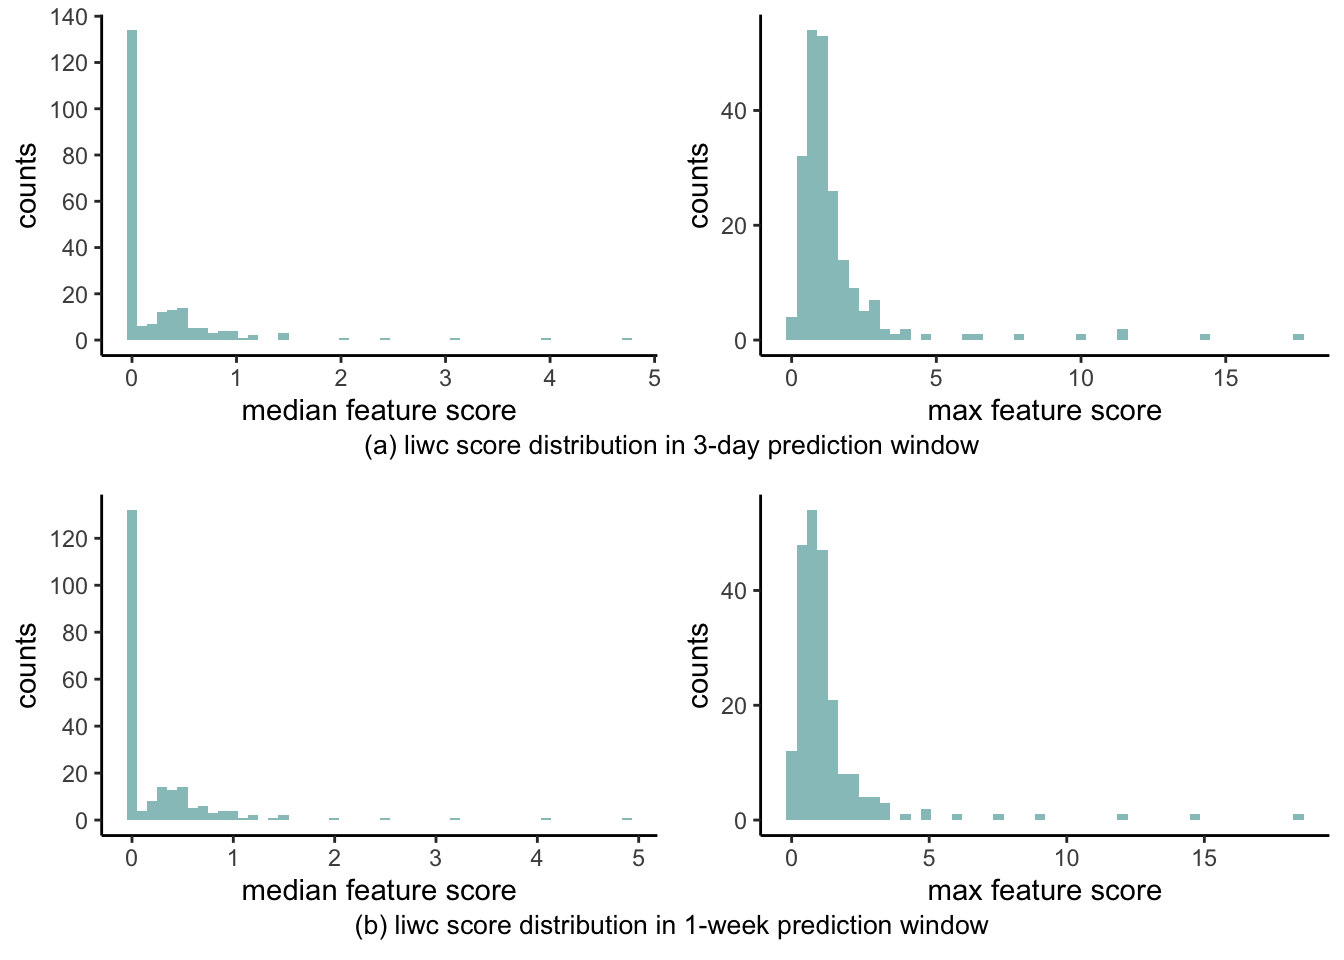

In [ ]:
plot_grid(plt1_ind +
            draw_label("(a) liwc score distribution in 3-day prediction window",
                       size = 10, x = 0.5, y = -0.03, hjust = 0.5, vjust = 0) +
            theme(plot.margin = margin(t = 0, r = 0, b = 15, l = 0)),
          plt2_ind + 
            draw_label("(b) liwc score distribution in 1-week prediction window",
                       x = 0.5, y = -0.03, hjust = 0.5, vjust = 0, size = 10) +
            theme(plot.margin = margin(t = 0, r = 0, b = 15, l = 0)),
          ncol = 1)


## EDA on concatenated messages

In [ ]:
plt1_cat <- plot_grid(
  stats_cat |> 
    filter(!str_detect(skim_variable, "wc|wps|analytic|tone|clout|authentic")) |>
    filter(str_detect(skim_variable, "raw_3day")) |> 
    # filter(numeric.p50 != 0) |> 
    ggplot(aes(x = numeric.p50)) +
    geom_histogram(fill = "#97C4C5", bins = 50) +
    scale_y_continuous(breaks = seq(0, 50, by = 10)) +
    labs(x = "median feature score", y = "counts"),
  stats_cat |> 
    filter(!str_detect(skim_variable, "wc|wps|analytic|tone|clout|authentic")) |>
    filter(str_detect(skim_variable, "raw_3day")) |> 
    ggplot(aes(x = numeric.p100)) +
    geom_histogram(fill = "#97C4C5", bins = 80) +
    scale_y_continuous(breaks = seq(0, 20, by = 5)) +
    labs(x = "max feature score", y = "counts")
)

plt2_cat <- plot_grid(
  stats_cat |> 
    filter(!str_detect(skim_variable, "wc|wps|analytic|tone|clout|authentic")) |>
    filter(str_detect(skim_variable, "raw_1week")) |> 
    # filter(numeric.p50 != 0) |> 
    ggplot(aes(x = numeric.p50)) +
    geom_histogram(fill = "#97C4C5", bins = 50) +
    scale_y_continuous(breaks = seq(0, 50, by = 10)) +
    labs(x = "median feature score", y = "counts"),
  stats_cat |> 
    filter(!str_detect(skim_variable, "wc|wps|analytic|tone|clout|authentic")) |>
    filter(str_detect(skim_variable, "raw_1week")) |> 
    ggplot(aes(x = numeric.p100)) +
    geom_histogram(fill = "#97C4C5", bins = 80) +
    scale_y_continuous(breaks = seq(0, 20, by = 5)) +
    labs(x = "max feature score", y = "counts")
)


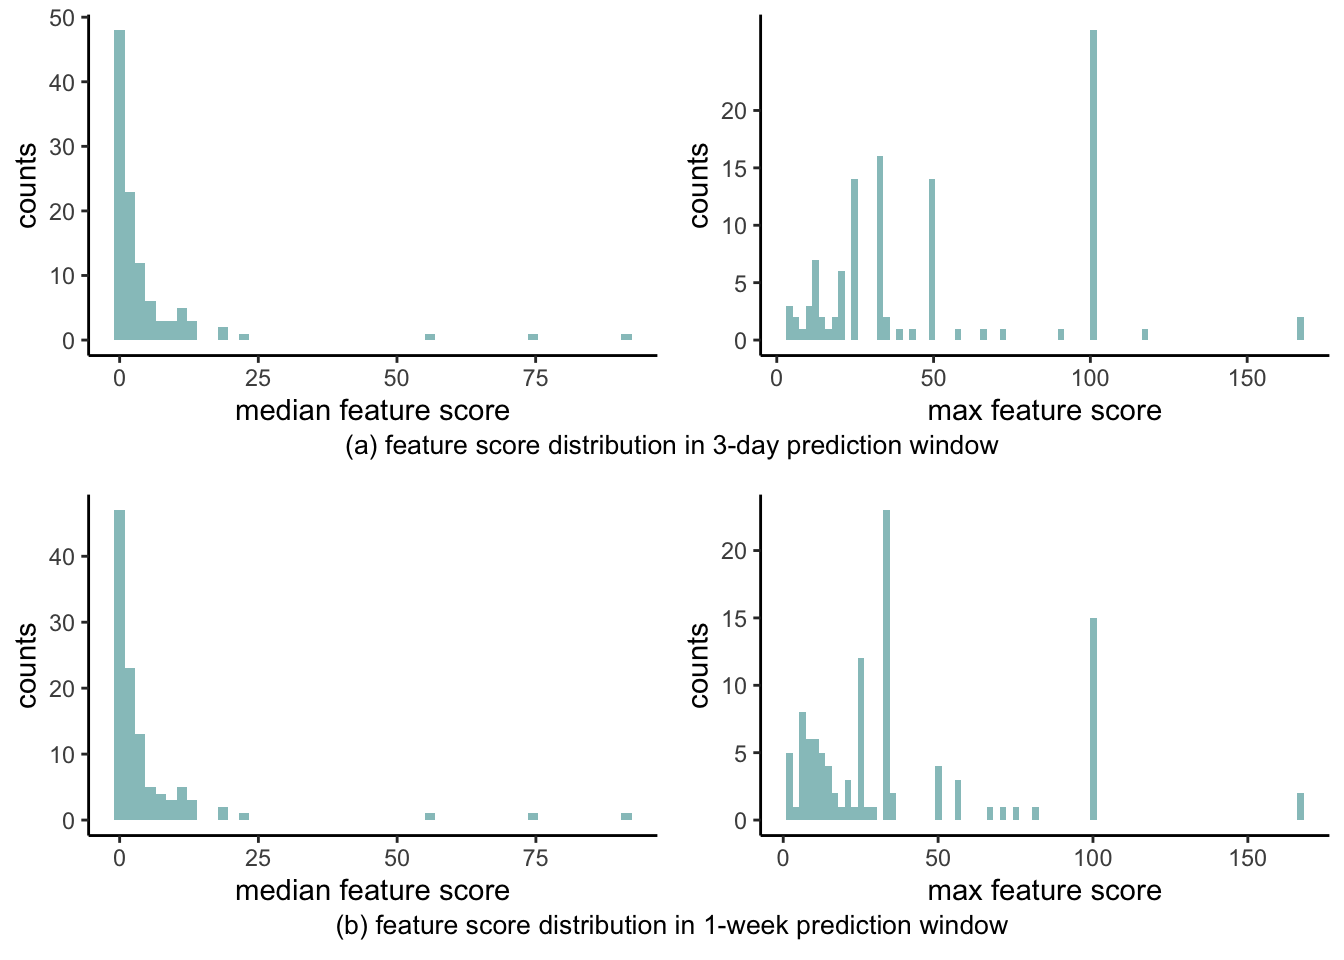

In [ ]:
plot_grid(plt1_cat +
            draw_label("(a) feature score distribution in 3-day prediction window",
                       size = 10, x = 0.5, y = -0.03, hjust = 0.5, vjust = 0) +
            theme(plot.margin = margin(t = 0, r = 0, b = 15, l = 0)),
          plt2_cat + 
            draw_label("(b) feature score distribution in 1-week prediction window",
                       x = 0.5, y = -0.03, hjust = 0.5, vjust = 0, size = 10) +
            theme(plot.margin = margin(t = 0, r = 0, b = 15, l = 0)),
          ncol = 1)


In [ ]:
plt3_cat <- plot_grid(
  stats_cat |> 
    filter(!str_detect(skim_variable, "wc|wps|analytic|tone|clout|authentic")) |>
    filter(str_detect(skim_variable, "norm_3day")) |> 
    # filter(numeric.p50 != 0) |> 
    ggplot(aes(x = numeric.p50)) +
    geom_histogram(fill = "#97C4C5", bins = 50) +
    scale_y_continuous(breaks = seq(0, 50, by = 10)) +
    labs(x = "median feature score", y = "counts"),
  stats_cat |> 
    filter(!str_detect(skim_variable, "wc|wps|analytic|tone|clout|authentic")) |>
    filter(str_detect(skim_variable, "norm_3day")) |> 
    ggplot(aes(x = numeric.p100)) +
    geom_histogram(fill = "#97C4C5", bins = 80) +
    scale_y_continuous(breaks = seq(0, 20, by = 5)) +
    labs(x = "max feature score", y = "counts")
)

plt4_cat <- plot_grid(
  stats_cat |> 
    filter(!str_detect(skim_variable, "wc|wps|analytic|tone|clout|authentic")) |>
    filter(str_detect(skim_variable, "norm_1week")) |> 
    # filter(numeric.p50 != 0) |> 
    ggplot(aes(x = numeric.p50)) +
    geom_histogram(fill = "#97C4C5", bins = 50) +
    scale_y_continuous(breaks = seq(0, 50, by = 10)) +
    labs(x = "median feature score", y = "counts"),
  stats_cat |> 
    filter(!str_detect(skim_variable, "wc|wps|analytic|tone|clout|authentic")) |>
    filter(str_detect(skim_variable, "norm_1week")) |> 
    ggplot(aes(x = numeric.p100)) +
    geom_histogram(fill = "#97C4C5", bins = 80) +
    scale_y_continuous(breaks = seq(0, 20, by = 5)) +
    labs(x = "max feature score", y = "counts")
)


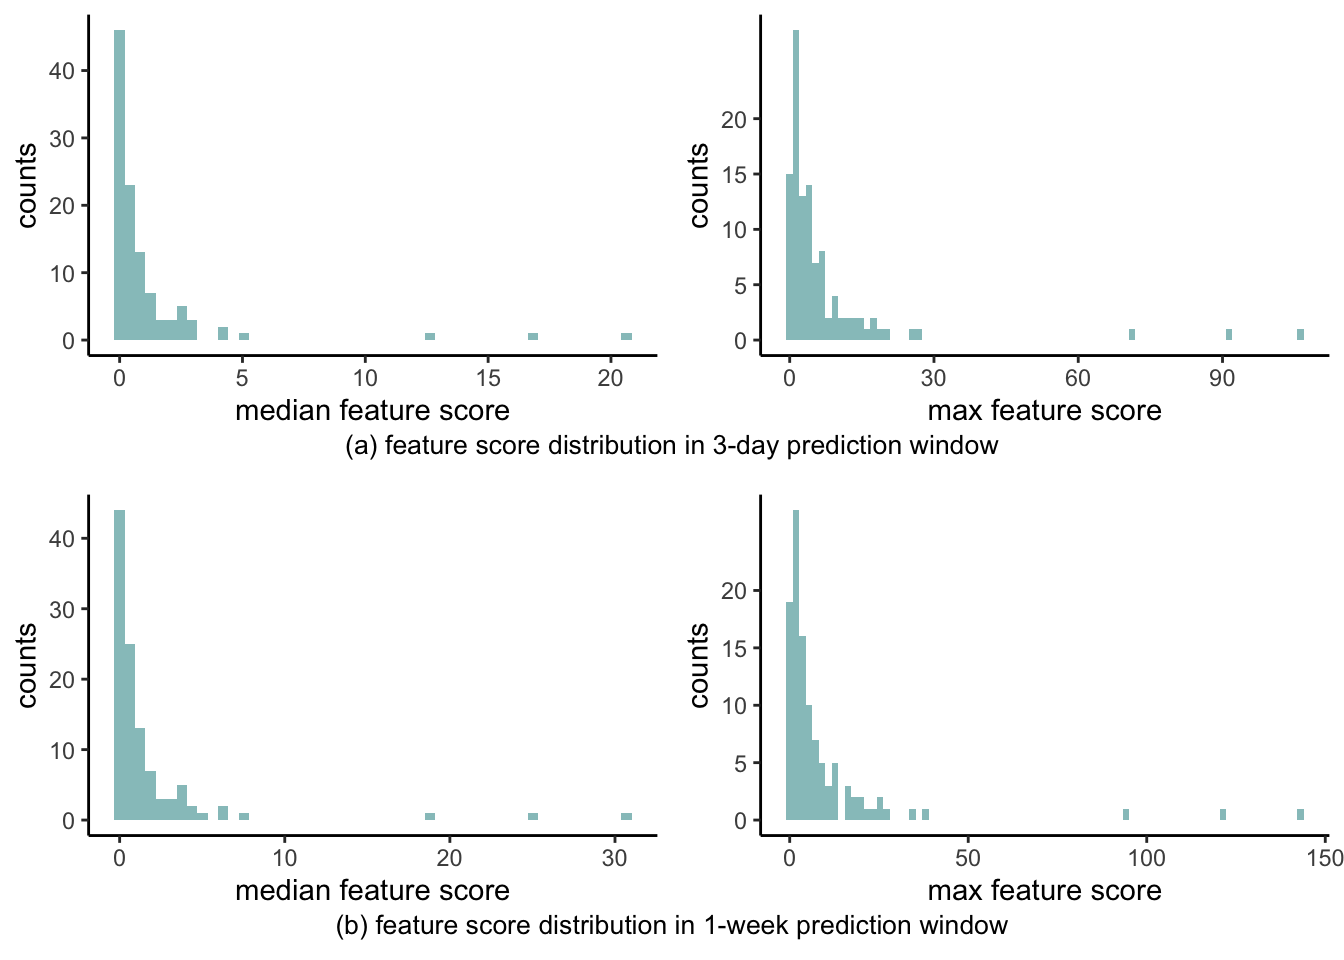

In [ ]:
plot_grid(plt3_cat +
            draw_label("(a) feature score distribution in 3-day prediction window",
                       size = 10, x = 0.5, y = -0.03, hjust = 0.5, vjust = 0) +
            theme(plot.margin = margin(t = 0, r = 0, b = 15, l = 0)),
          plt4_cat + 
            draw_label("(b) feature score distribution in 1-week prediction window",
                       x = 0.5, y = -0.03, hjust = 0.5, vjust = 0, size = 10) +
            theme(plot.margin = margin(t = 0, r = 0, b = 15, l = 0)),
          ncol = 1)
